In [1]:
API = 'https://api.helium.io/'

In [2]:
import requests

In [3]:
r = requests.get('https://api.helium.io/v1/locations/8c08866198e4bff')

In [4]:
r.json()

{'data': {'short_street': 'Skeppargatan',
  'short_state': 'Stockholms län',
  'short_country': 'SE',
  'short_city': 'Östermalm',
  'long_street': 'Skeppargatan',
  'long_state': 'Stockholms län',
  'long_country': 'Sweden',
  'long_city': 'Östermalm',
  'location': '8c08866198e4bff',
  'city_id': 'w7ZzdGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg'}}

In [5]:
r = requests.get('https://api.helium.io/v1/stats')

In [6]:
r.json()

{'data': {'token_supply': 84287207.33596148,
  'state_channel_counts': {'last_week': {'num_packets': 6629451,
    'num_dcs': 11205292},
   'last_month': {'num_packets': 24152867, 'num_dcs': 53099841},
   'last_day': {'num_packets': 659751, 'num_dcs': 810623}},
  'fees': {'last_week': {'transaction': 461550000, 'staking': 7323000000},
   'last_month': {'transaction': 1959060000, 'staking': 26757000000},
   'last_day': {'transaction': 63860000, 'staking': 603000000}},
  'election_times': {'last_week': {'stddev': 2744.826041131556,
    'avg': 3123.139175257732},
   'last_month': {'stddev': 1972.673567579115, 'avg': 2708.5511651469096},
   'last_hour': {'stddev': None, 'avg': 3171.0},
   'last_day': {'stddev': 1734.903321364842, 'avg': 2996.9655172413795}},
  'counts': {'transactions': 54401352,
   'hotspots': 28695,
   'countries': 68,
   'consensus_groups': 21088,
   'cities': 3977,
   'challenges': 20357842,
   'blocks': 819630},
  'challenge_counts': {'last_day': 56239, 'active': 0},
 

In [7]:
r = requests.get('https://api.helium.io/v1/hotspots/name/small-leather-nuthatch')

In [8]:
r.json()

{'data': [{'lng': 18.09012557886758,
   'lat': 59.34257271627216,
   'timestamp_added': '2020-10-02T10:32:05.000000Z',
   'status': {'online': 'online',
    'listen_addrs': ['/p2p/11erMRX9WunK67MVwGLkDDhTdLC9wEriEvYQffWQ392BSWS8AVy/p2p-circuit/p2p/112ZdtYTRoSQrXm3XthtUqQMP7BfmMzpMncKdUZxGxkPLJYCWrfg'],
    'height': 819615},
   'reward_scale': 0.625,
   'owner': '14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU',
   'nonce': 1,
   'name': 'small-leather-nuthatch',
   'location': '8c08866198e4bff',
   'last_poc_challenge': 819621,
   'last_change_block': 819621,
   'geocode': {'short_street': 'Skeppargatan',
    'short_state': 'Stockholms län',
    'short_country': 'SE',
    'short_city': 'Östermalm',
    'long_street': 'Skeppargatan',
    'long_state': 'Stockholms län',
    'long_country': 'Sweden',
    'long_city': 'Östermalm',
    'city_id': 'w7ZzdGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg'},
   'gain': 12,
   'elevation': 0,
   'block_added': 526389,
   'block': 819634,
   'address': 

In [11]:
results = []
cursor=''

In [12]:
while cursor is not None:
    r = requests.get('https://api.helium.wtf/v1/cities?cursor={}'.format(cursor))
    cursor = r.json()['cursor']
    results.append(r.json())

KeyError: 'cursor'

In [15]:
len(results)

43

In [16]:
results[0]['data'][1].keys()

dict_keys(['short_state', 'short_country', 'short_city', 'online_count', 'offline_count', 'long_state', 'long_country', 'long_city', 'hotspot_count', 'city_id'])

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame(columns=results[0]['data'][1].keys())

In [19]:
df

,short_state,short_country,short_city,online_count,offline_count,long_state,long_country,long_city,hotspot_count,city_id


In [20]:
d2 = {}

In [21]:
i=0

In [22]:

for res in results:
    for x in res['data']:
        i=i+1
        d2[i] = x

In [23]:
df = pd.DataFrame.from_dict(d2, orient='index')

In [24]:
df.to_csv('hotspot_count_city')

In [25]:
import pandas as pd
df = pd.read_csv('hotspot_count_city')

In [26]:
df[df['short_country']=='SE']['hotspot_count'].sum()

190

In [27]:
df[df['short_country']=='SE']['long_state'].value_counts()

Stockholms län          25
Västra Götalands län    23
Uppsala län             12
Skåne län               11
Kalmar län               3
Värmlands län            1
Östergötlands län        1
Gävleborgs län           1
Västerbottens län        1
Norrbottens län          1
Södermanlands län        1
Name: long_state, dtype: int64

In [28]:
df_swe = df[df['short_country']=='SE']

In [29]:
df_swe['city_id'].value_counts()

ZW5za2VkZS3DpXJzdGEtdmFudMO2cnN0b2NraG9sbXMgbMOkbnN3ZWRlbg     1
c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg                     1
aMOkZ2Vyc3Rlbi1saWxqZWhvbG1lbnN0b2NraG9sbXMgbMOkbnN3ZWRlbg     1
aHV2dWRzdGFzdG9ja2hvbG1zIGzDpG5zd2VkZW4                        1
bm9ycmEgbnluw6RzaGFtbnN0b2NraG9sbXMgbMOkbnN3ZWRlbg             1
                                                              ..
YnLDpG1hcmVnw6VyZGVudsOkc3RyYSBnw7Z0YWxhbmRzIGzDpG5zd2VkZW4    1
Z3LDpG5ieXVwcHNhbGEgbMOkbnN3ZWRlbg                             1
a3VuZ3PDpG5nZW51cHBzYWxhIGzDpG5zd2VkZW4                        1
YmrDtnJraGFnZW5zdG9ja2hvbG1zIGzDpG5zd2VkZW4                    1
dXBwbGFuZHMgdsOkc2J5IHbDpHN0cmFzdG9ja2hvbG1zIGzDpG5zd2VkZW4    1
Name: city_id, Length: 80, dtype: int64

In [30]:
r = requests.get('https://api.helium.io/v1/cities/{}/hotspots'.format(df_swe['city_id'].iloc[0]))
r.json()['data']

[{'lng': 20.299032256700443,
  'lat': 63.81342045715797,
  'timestamp_added': '2020-10-30T07:29:20.000000Z',
  'status': {'online': 'online',
   'listen_addrs': ['/ip4/87.96.151.71/tcp/56801'],
   'height': 819614},
  'reward_scale': 1.0,
  'owner': '132F1Ad16kiwoBQ77kw3yMCUdnyTBi3xxgEyC1nXxNsbpRxuZ1K',
  'nonce': 2,
  'name': 'mysterious-iron-crab',
  'location': '8c08f62cec451ff',
  'last_poc_challenge': 819434,
  'last_change_block': 819484,
  'geocode': {'short_street': 'Gluntens väg',
   'short_state': 'Västerbottens län',
   'short_country': 'SE',
   'short_city': 'Ålidhem',
   'long_street': 'Gluntens väg',
   'long_state': 'Västerbottens län',
   'long_country': 'Sweden',
   'long_city': 'Ålidhem',
   'city_id': 'w6VsaWRoZW12w6RzdGVyYm90dGVucyBsw6Ruc3dlZGVu'},
  'gain': 12,
  'elevation': 0,
  'block_added': 565975,
  'block': 819636,
  'address': '11B3w7ixQEEPdyhuJDLtceEXg4qUzcJCLv5PVzBSQJUkn3Y7hjH'},
 {'lng': 20.293265545068234,
  'lat': 63.81450108785943,
  'timestamp_added'

In [31]:
for c in pd.unique(df_swe['city_id']):
    r = requests.get('https://api.helium.io/v1/cities/{}/hotspots'.format(c))
    r.json()['data']

In [32]:
r = requests.get('https://api.helium.io/v1/accounts/rich')
g=0
b=0
for idx,i in enumerate(r.json()['data']):
    if i['address'] == '14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU':
        g=idx
        b=i['balance']

In [33]:
g

0

In [34]:
b

0

In [35]:
r = requests.get('https://api.helium.io/v1/accounts/14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU')
r.json()

{'data': {'speculative_sec_nonce': 0,
  'speculative_nonce': 42,
  'sec_nonce': 0,
  'sec_balance': 0,
  'nonce': 42,
  'dc_nonce': 0,
  'dc_balance': 0,
  'block': 819636,
  'balance': 1216914540479,
  'address': '14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU'}}

In [36]:
def req(string):
    r = requests.get(string)
    return r.json()

res = req('https://api.helium.io/v1/accounts/14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU/hotspots')

In [37]:
len(res['data'])

73

In [38]:
res['data'][0]['name']

'muscular-juniper-mongoose'

In [39]:
relay = [res['data'][x]['status']['listen_addrs'] for x in range(len(res['data']))]

In [40]:
l = []
for r in res['data']:
    if r['status']['listen_addrs']:
        if 'p2p' in r['status']['listen_addrs'][0]:
            l.append(r['name'])

In [41]:
pd.DataFrame(l).to_csv('relayed.csv')

In [42]:
l

['muscular-juniper-mongoose',
 'gentle-concrete-swallow',
 'flat-taffy-squid',
 'prehistoric-hazelnut-sheep',
 'beautiful-berry-puma',
 'shambolic-silver-capybara',
 'micro-carob-narwhal',
 'little-paisley-badger',
 'hot-malachite-hawk',
 'quick-zinc-seagull',
 'expert-ultraviolet-huskie',
 'round-lavender-millipede',
 'sharp-leather-llama',
 'silly-denim-barbel',
 'dandy-maroon-moose',
 'small-leather-nuthatch',
 'plain-fuchsia-alligator',
 'short-mulberry-mallard',
 'itchy-merlot-porcupine']

In [43]:
relay[2]

['/p2p/112vnvaphpWiGe7cgqVB2PDC7fgfiS5vdQG2AmMZF9pBPxNbrNYg/p2p-circuit/p2p/112uMtzhUEfEV3z1SjuTSKLY1PXJY2tHhorFEPR2SeW9aCJgR2dM']

In [44]:
i=0
for r in relay:
    if r:
        if 'p2p' in r[0]:
            i=i+1

In [45]:
i

19

In [46]:
req('https://api.helium.io/v1/accounts/14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU/rewards/sum?min_time=2020-05-16T19:05:01Z&max_time=2021-03-16T19:05:01Z')

{'meta': {'min_time': '2020-05-16T19:05:01Z',
  'max_time': '2021-03-16T19:05:01Z'},
 'data': {'total': 86410.17565551,
  'sum': 8641017565551,
  'stddev': 1619.82019474,
  'min': 0.07143702,
  'median': 590.145778,
  'max': 8004.94122185,
  'avg': 1183.7010363768493}}

In [47]:
cursor = ''
results = []
while cursor is not None:
    r = req('https://api.helium.io/v1/hotspots?cursor={}'.format(cursor))
    results.append(r['data'])
    try:
        cursor = r['cursor']
    except:
        break


In [48]:
results.append(r['data'])

In [49]:
d3 = {}
res = []
for r in results:
    res = res + r

In [50]:
len(res)

29392

In [51]:
for idx,r in enumerate(res):
    d3[idx] = r

In [52]:
df3 = pd.DataFrame.from_dict(d3, orient='index')

In [53]:
df3_geo = df3['geocode'].apply(pd.Series)

In [54]:
df3_status = df3['status'].apply(pd.Series)

In [55]:
df4 = df3.join(df3_geo).join(df3_status)

In [56]:
df4.shape

(29392, 29)

In [57]:
df4 = df4.drop(['status','geocode'],axis=1)

In [58]:
df4.columns

Index(['timestamp_added', 'reward_scale', 'owner', 'nonce', 'name', 'location',
       'last_poc_challenge', 'last_change_block', 'gain', 'elevation',
       'block_added', 'block', 'address', 'lng', 'lat', 'short_street',
       'short_state', 'short_country', 'short_city', 'long_street',
       'long_state', 'long_country', 'long_city', 'city_id', 'online',
       'listen_addrs', 'height'],
      dtype='object')

In [59]:
df4.to_csv('all_hotspots_april26-2021.csv')

In [60]:
df4_swe = df4[df4['short_country']=='SE']

In [61]:
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
len(df4_swe)

190

In [81]:
df4_swe[df4_swe['owner']=='14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU']['timestamp_added'][::-1]

189    2020-08-31T12:22:36.000000Z
188    2020-09-22T19:44:07.000000Z
180    2020-10-01T17:27:33.000000Z
179    2020-10-01T18:05:55.000000Z
178    2020-10-01T18:33:42.000000Z
                  ...             
65     2021-02-02T16:36:16.000000Z
61     2021-02-03T08:07:22.000000Z
60     2021-02-03T08:31:10.000000Z
54     2021-02-04T22:55:02.000000Z
41     2021-03-02T19:11:35.000000Z
Name: timestamp_added, Length: 73, dtype: object

(189    2020-08-31T12:22:36.000000Z
 188    2020-09-22T19:44:07.000000Z
 187    2020-09-25T11:16:32.000000Z
 186    2020-09-28T16:09:41.000000Z
 185    2020-09-28T18:02:13.000000Z
                   ...             
 4      2021-04-16T17:13:13.000000Z
 3      2021-04-21T17:13:42.000000Z
 2      2021-04-21T18:48:02.000000Z
 1      2021-04-22T16:34:03.000000Z
 0      2021-04-23T19:01:52.000000Z
 Name: timestamp_added, Length: 190, dtype: object, 190)

In [107]:
dates_full = pd.to_datetime(df4_swe['timestamp_added'])[::-1]

In [108]:
dates_galiot = pd.to_datetime(df4_swe[df4_swe['owner']=='14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU']['timestamp_added'])[::-1]

In [115]:
dates_galiot[0] = dates_full[0]

In [117]:
values_galiot = list(range(1,len(df4_swe[df4_swe['owner']=='14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU'])+1))

In [119]:
values_galiot.append(values_galiot[-1])

In [120]:
values_galiot

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 73]

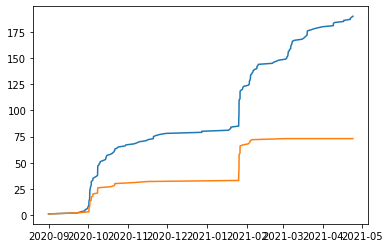

In [121]:
plt.plot(pd.to_datetime(df4_swe['timestamp_added'])[::-1],list(range(1,len(df4_swe)+1)))
plt.plot(dates_galiot,values_galiot)

In [122]:
type(df4_swe['timestamp_added'].iloc[0])

str

In [123]:
df4_swe['timestamp_added']

0      2021-04-23T19:01:52.000000Z
1      2021-04-22T16:34:03.000000Z
2      2021-04-21T18:48:02.000000Z
3      2021-04-21T17:13:42.000000Z
4      2021-04-16T17:13:13.000000Z
                  ...             
185    2020-09-28T18:02:13.000000Z
186    2020-09-28T16:09:41.000000Z
187    2020-09-25T11:16:32.000000Z
188    2020-09-22T19:44:07.000000Z
189    2020-08-31T12:22:36.000000Z
Name: timestamp_added, Length: 190, dtype: object

In [124]:
df4_swe[df4_swe['owner']=='14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU']

,Unnamed: 0,timestamp_added,reward_scale,owner,nonce,name,location,last_poc_challenge,last_change_block,gain,...,short_country,short_city,long_street,long_state,long_country,long_city,city_id,online,listen_addrs,height
41,9609,2021-03-02T19:11:35.000000Z,1.000000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,2,muscular-juniper-mongoose,8c0886602a08dff,819593.0,819636,12.0,...,SE,Kungsholmen,Orvar Odds väg,Stockholms län,Sweden,Kungsholmen,a3VuZ3Nob2xtZW5zdG9ja2hvbG1zIGzDpG5zd2VkZW4,online,['/p2p/11oNmxJFUmpA2ir3KUadbUWjCNU4UEuQD8fN5Wb...,819594.0
54,10921,2021-02-04T22:55:02.000000Z,1.000000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,basic-goldenrod-donkey,8c08862b1416dff,819594.0,819619,12.0,...,SE,Upplands Väsby Västra,Holmvägen,Stockholms län,Sweden,Upplands Väsby Västra,dXBwbGFuZHMgdsOkc2J5IHbDpHN0cmFzdG9ja2hvbG1zIG...,online,['/ip4/85.228.46.22/tcp/44158'],819604.0
60,11020,2021-02-03T08:31:10.000000Z,0.500000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,gentle-concrete-swallow,8c08b688ec091ff,819483.0,819533,12.0,...,SE,Brämhult,Aspgatan,Västra Götalands län,Sweden,Brämhult,YnLDpG1odWx0dsOkc3RyYSBnw7Z0YWxhbmRzIGzDpG5zd2...,online,['/p2p/112vnvaphpWiGe7cgqVB2PDC7fgfiS5vdQG2AmM...,819589.0
61,11021,2021-02-03T08:07:22.000000Z,0.625000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,2,flat-taffy-squid,8c088661dd8d5ff,819526.0,819633,12.0,...,SE,Kungsholmen,Pipersgatan,Stockholms län,Sweden,Kungsholmen,a3VuZ3Nob2xtZW5zdG9ja2hvbG1zIGzDpG5zd2VkZW4,online,['/p2p/112urckjdyBhA9yhCgQWMV8yEYk7BzZDRQgt3Be...,819615.0
65,11079,2021-02-02T16:36:16.000000Z,0.468750,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,2,prehistoric-hazelnut-sheep,8c0886618422dff,819420.0,819633,12.0,...,SE,Södermalm,Renstiernas gata,Stockholms län,Sweden,Södermalm,c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg,online,['/p2p/112ajjjFMciKi1RqR7Ax1PTapuK7cTuseVGVCZT...,819618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,19461,2020-10-01T18:33:42.000000Z,1.000000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,deep-orchid-loris,8c088661136d7ff,819449.0,819560,12.0,...,SE,Södermalm,Bergsundsgatan,Stockholms län,Sweden,Södermalm,c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg,online,['/ip4/188.151.184.92/tcp/18482'],819599.0
179,19464,2020-10-01T18:05:55.000000Z,0.625000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,sleepy-mahogany-alligator,8c0886618c9ddff,819392.0,819619,12.0,...,SE,Södermalm,Svartensgatan,Stockholms län,Sweden,Södermalm,c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg,online,['/ip4/81.228.198.231/tcp/26014'],819618.0
180,19468,2020-10-01T17:27:33.000000Z,0.208328,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,large-fuzzy-porcupine,8c088661e2165ff,819405.0,819619,12.0,...,SE,Södermalm,Vartoftagatan,Stockholms län,Sweden,Södermalm,c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg,online,['/ip4/100.124.96.196/tcp/44158'],819617.0
188,20014,2020-09-22T19:44:07.000000Z,1.000000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,bubbly-parchment-moth,8c088660269b1ff,819608.0,819636,12.0,...,SE,Södermalm,Pokalvägen,Stockholms län,Sweden,Södermalm,c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg,online,['/ip4/13.48.149.139/tcp/44158'],819612.0


In [125]:
df4_swe[df4_swe['owner']=='14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL']

,Unnamed: 0,timestamp_added,reward_scale,owner,nonce,name,location,last_poc_challenge,last_change_block,gain,...,short_country,short_city,long_street,long_state,long_country,long_city,city_id,online,listen_addrs,height
22,6528,2021-03-15T09:25:34.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,overt-cornflower-goblin,8c1f25068a629ff,819571.0,819621,12.0,...,SE,Guldheden,Doktor Allards Gata,Västra Götalands län,Sweden,Guldheden,Z3VsZGhlZGVudsOkc3RyYSBnw7Z0YWxhbmRzIGzDpG5zd2...,online,['/ip4/188.148.171.178/tcp/44158'],819614.0
32,9052,2021-03-05T16:52:46.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,proper-wintergreen-halibut,8c1f2506d729bff,819486.0,819536,12.0,...,SE,Johanneberg,Vidblicksgatan,Västra Götalands län,Sweden,Johanneberg,am9oYW5uZWJlcmd2w6RzdHJhIGfDtnRhbGFuZHMgbMOkbn...,online,['/ip4/188.149.41.135/tcp/44158'],819615.0
46,10672,2021-02-09T16:12:53.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,passive-zinc-panther,8c08b615dab2bff,819592.0,819592,12.0,...,SE,Timmele,Överstegränd,Västra Götalands län,Sweden,Timmele,dGltbWVsZXbDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3dlZGVu,online,['/p2p/112KW3WwX89B6yP7uqH4vjZ7dhq8EekjpoBNDDr...,819602.0
48,10743,2021-02-08T14:34:42.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,able-pear-horse,8c08b602cdb4dff,819562.0,819619,12.0,...,SE,Ulricehamn,Hasselvägen,Västra Götalands län,Sweden,Ulricehamn,dWxyaWNlaGFtbnbDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3...,online,['/p2p/112bpmtUsVEeqnnra66vRF8r5aBFzL7cGRVRq5N...,819597.0
50,10746,2021-02-08T13:11:56.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,damp-cloth-tapir,8c08b61526d83ff,819548.0,819619,12.0,...,SE,Ulricehamn,Sanatorievägen,Västra Götalands län,Sweden,Ulricehamn,dWxyaWNlaGFtbnbDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3...,online,['/ip4/213.200.174.169/tcp/59670'],819604.0
51,10840,2021-02-06T16:00:54.000000Z,0.333328,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,trendy-coconut-shell,8c08b61536905ff,819495.0,819545,12.0,...,SE,Ulricehamn,Arrehagsvägen,Västra Götalands län,Sweden,Ulricehamn,dWxyaWNlaGFtbnbDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3...,online,['/p2p/11z7V5iN2fm6yj96hvfgUm49VD3ZTq4RFw4MgWo...,819618.0
56,10999,2021-02-03T18:26:13.000000Z,0.333328,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,quick-sapphire-liger,8c08b615370adff,819457.0,819633,12.0,...,SE,Ulricehamn SO,Stenmursgatan,Västra Götalands län,Sweden,Ulricehamn SO,dWxyaWNlaGFtbiBzb3bDpHN0cmEgZ8O2dGFsYW5kcyBsw6...,online,['/p2p/11GP9eXcmSbLA6Ggb2aMNvaTkdCwE7iJXDb2cNF...,819618.0
57,11002,2021-02-03T17:32:41.000000Z,0.333328,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,hidden-topaz-cougar,8c08b61536695ff,819554.0,819619,12.0,...,SE,Ulricehamn SO,Tåmarksgatan,Västra Götalands län,Sweden,Ulricehamn SO,dWxyaWNlaGFtbiBzb3bDpHN0cmEgZ8O2dGFsYW5kcyBsw6...,online,['/ip4/81.234.116.176/tcp/44158'],819618.0
58,11008,2021-02-03T15:56:58.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,dancing-green-haddock,8c08b602c8707ff,819553.0,819603,12.0,...,SE,Ulricehamn,Riddarebacken,Västra Götalands län,Sweden,Ulricehamn,dWxyaWNlaGFtbnbDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3...,online,['/ip4/81.234.161.191/tcp/44158'],819595.0


In [126]:
df4_swe.to_csv('swe_hotspots-april26-2021.csv')

In [127]:
import pandas as pd

df4_swe = pd.read_csv('swe_hotspots-april26-2021.csv')

In [71]:
df4_swe['owner'].value_counts()

14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU    73
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y    22
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd    12
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL     9
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM     6
13NCaCjEqGPCrMgEGkzjLEAX3dfaGDNA9SksARATyRgEyxuJLGg     5
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5     5
14BT97xnPZ9YfmeTxmuMhstxB8zHS8FeTUDxqPp38duW7NPHNCg     5
14SiXdBfQT15p43yGuHRFwg9ynP3Fx8ELErkbAUH9H326mGtrA4     4
13v9kMn5p1a3Y5vqnPxzqfaiEhhrRBaMLYk7SmiN3pJEx1WmBpT     4
13H9ykhRaWw8AVEMqf7rV6Fn9fnLXxZ6G98JEdsA1gdcJKYqQYW     4
14DXurfTM8ZRek6msvJWNGzpzCV836cu31Xw67zf8QJG9UtfQLV     3
13hZcW2J69JUK6vodvzR7PhA5BKNAgEUsi466WBbTw2EhAqVxej     3
13rbdSBcshNAkLLJKiBUxzYjRnX3G551AUd1CVGqqe7HExScDc4     3
13dHSjJ1judroDkgD158RmRki6U5Ypqpq8ZSmyk56AW5HiYRDWJ     2
132rjofoPRZ86KxfvhasuDjNFcej7Lm1oGq8x4oRviJUCkwAuzA     2
14inhtM57SDS6QL6KLPVQYYcUSZGD7xjB7hndQm6aq8Z67i5u3e     2
13SaBus2Z8sHqr

# Rewards per hotspot and owner

In [72]:
df4_swe['owner'].value_counts().head(10).index

Index(['14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU',
       '13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y',
       '13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd',
       '14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL',
       '14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM',
       '13NCaCjEqGPCrMgEGkzjLEAX3dfaGDNA9SksARATyRgEyxuJLGg',
       '13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5',
       '14BT97xnPZ9YfmeTxmuMhstxB8zHS8FeTUDxqPp38duW7NPHNCg',
       '14SiXdBfQT15p43yGuHRFwg9ynP3Fx8ELErkbAUH9H326mGtrA4',
       '13v9kMn5p1a3Y5vqnPxzqfaiEhhrRBaMLYk7SmiN3pJEx1WmBpT'],
      dtype='object')

In [73]:
len(list(df4_swe['owner'].value_counts().head(10).index))

10

In [74]:
res = []
d5 = {}
min = '2020-05-30'
max = '2021-06-30'
for owner in list(df4_swe['owner'].value_counts().head(10).index):
    d5[owner]=req('https://api.helium.io/v1/accounts/{owner}/rewards/sum?min_time={min}&max_time={max}'.format(owner=owner,min=min,max=max))['data']
    #d5[owner]=req('https://api.helium.io/v1/accounts/{owner}/rewards/sum?min_time={min}&max_time={max}&bucket=week'.format(owner=owner,min=min,max=max))['data']

In [75]:
df_reward = pd.DataFrame.from_dict(d5,orient='index')

In [76]:
df_reward.to_csv('reward_per_owner.csv')

In [77]:
max_amount = 0
for r in req('https://api.helium.io/v1/hotspots/112uMtzhUEfEV3z1SjuTSKLY1PXJY2tHhorFEPR2SeW9aCJgR2dM/rewards?min_time=2021-02-01&max_time=2021-03-01&cursor=eyJlbmRfYmxvY2siOjY5OTY1OSwiYmxvY2siOjc0MTMwMCwiYW5jaG9yX2Jsb2NrIjo3NDEzMDB9')['data']:
    if r['amount'] > max_amount:
        max_amount = r['amount']

In [78]:
req('https://api.helium.io/v1/accounts/14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU/rewards/sum?min_time=-7%20day')

{'meta': {'min_time': '2021-04-19T11:25:55Z',
  'max_time': '2021-04-26T11:25:55Z'},
 'data': {'total': 2785.1045832,
  'sum': 278510458320,
  'stddev': 33.08959157,
  'min': 0.588819,
  'median': 30.26152864,
  'max': 148.56196533,
  'avg': 39.22682511549296}}

In [85]:
req('https://api.helium.io/v1/accounts/{owner}/rewards/sum?min_time={min}&max_time={max}')

{'error': 'Bad Request'}

In [86]:
res = []
d6 = {}
min = '-7%20day'
for owner in list(df4_swe['owner'].value_counts().head(10).index):
    d6[owner]=req('https://api.helium.io/v1/accounts/{}/rewards/sum?min_time=-7%20day'.format(owner))['data']

In [87]:
df4_swe['owner'].value_counts().head(10).index

Index(['14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU',
       '13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y',
       '13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd',
       '14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL',
       '14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM',
       '13NCaCjEqGPCrMgEGkzjLEAX3dfaGDNA9SksARATyRgEyxuJLGg',
       '13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5',
       '14BT97xnPZ9YfmeTxmuMhstxB8zHS8FeTUDxqPp38duW7NPHNCg',
       '14SiXdBfQT15p43yGuHRFwg9ynP3Fx8ELErkbAUH9H326mGtrA4',
       '13v9kMn5p1a3Y5vqnPxzqfaiEhhrRBaMLYk7SmiN3pJEx1WmBpT'],
      dtype='object')

In [88]:
df_swe_rewards_last_week = pd.DataFrame.from_dict(d6, orient='index').rename({'index':'owners'},axis=1)

In [89]:
df_swe_rewards_last_week

,total,sum,stddev,min,median,max,avg
14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU,2785.104583,278510458320,33.089592,0.588819,30.261529,148.561965,39.226825
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y,753.581229,75358122856,45.033710,1.109836,67.895639,139.696453,53.827231
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd,534.718375,53471837477,24.040897,13.693284,40.862044,83.772194,44.559865
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL,332.440647,33244064732,12.333696,21.248435,34.547820,54.862675,36.937850
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM,309.280586,30928058621,20.669896,28.813571,46.331969,81.336107,51.546764
13NCaCjEqGPCrMgEGkzjLEAX3dfaGDNA9SksARATyRgEyxuJLGg,161.167367,16116736684,17.377955,14.931548,33.290683,58.634553,32.233473
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5,2362.880353,236288035261,20.534595,0.044067,1.401897,144.164976,11.198485
14BT97xnPZ9YfmeTxmuMhstxB8zHS8FeTUDxqPp38duW7NPHNCg,424.575938,42457593802,28.276559,51.683722,91.074741,124.140310,84.915188
14SiXdBfQT15p43yGuHRFwg9ynP3Fx8ELErkbAUH9H326mGtrA4,123.295232,12329523228,21.724939,7.701923,28.169352,59.254606,30.823808
13v9kMn5p1a3Y5vqnPxzqfaiEhhrRBaMLYk7SmiN3pJEx1WmBpT,203.048695,20304869514,55.240466,11.439385,30.679279,130.250752,50.762174


In [91]:
df_total_swe = df4_swe['owner'].value_counts().head(10)
df_total_swe 

14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU    73
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y    22
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd    12
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL     9
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM     6
13NCaCjEqGPCrMgEGkzjLEAX3dfaGDNA9SksARATyRgEyxuJLGg     5
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5     5
14BT97xnPZ9YfmeTxmuMhstxB8zHS8FeTUDxqPp38duW7NPHNCg     5
14SiXdBfQT15p43yGuHRFwg9ynP3Fx8ELErkbAUH9H326mGtrA4     4
13v9kMn5p1a3Y5vqnPxzqfaiEhhrRBaMLYk7SmiN3pJEx1WmBpT     4
Name: owner, dtype: int64

In [92]:

df_total_swe.columns = ['owners','hotspots']

In [93]:
df_weekly_swe = pd.DataFrame(df_total_swe).join(df_swe_rewards_last_week)

In [94]:
df_weekly_swe

,owner,total,sum,stddev,min,median,max,avg
14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU,73,2785.104583,278510458320,33.089592,0.588819,30.261529,148.561965,39.226825
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y,22,753.581229,75358122856,45.033710,1.109836,67.895639,139.696453,53.827231
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd,12,534.718375,53471837477,24.040897,13.693284,40.862044,83.772194,44.559865
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL,9,332.440647,33244064732,12.333696,21.248435,34.547820,54.862675,36.937850
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM,6,309.280586,30928058621,20.669896,28.813571,46.331969,81.336107,51.546764
13NCaCjEqGPCrMgEGkzjLEAX3dfaGDNA9SksARATyRgEyxuJLGg,5,161.167367,16116736684,17.377955,14.931548,33.290683,58.634553,32.233473
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5,5,2362.880353,236288035261,20.534595,0.044067,1.401897,144.164976,11.198485
14BT97xnPZ9YfmeTxmuMhstxB8zHS8FeTUDxqPp38duW7NPHNCg,5,424.575938,42457593802,28.276559,51.683722,91.074741,124.140310,84.915188
14SiXdBfQT15p43yGuHRFwg9ynP3Fx8ELErkbAUH9H326mGtrA4,4,123.295232,12329523228,21.724939,7.701923,28.169352,59.254606,30.823808
13v9kMn5p1a3Y5vqnPxzqfaiEhhrRBaMLYk7SmiN3pJEx1WmBpT,4,203.048695,20304869514,55.240466,11.439385,30.679279,130.250752,50.762174


In [95]:
df_weekly_swe['total']

14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU    2785.104583
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y     753.581229
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd     534.718375
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL     332.440647
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM     309.280586
13NCaCjEqGPCrMgEGkzjLEAX3dfaGDNA9SksARATyRgEyxuJLGg     161.167367
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5    2362.880353
14BT97xnPZ9YfmeTxmuMhstxB8zHS8FeTUDxqPp38duW7NPHNCg     424.575938
14SiXdBfQT15p43yGuHRFwg9ynP3Fx8ELErkbAUH9H326mGtrA4     123.295232
13v9kMn5p1a3Y5vqnPxzqfaiEhhrRBaMLYk7SmiN3pJEx1WmBpT     203.048695
Name: total, dtype: float64

In [96]:
df_weekly_swe['total']/df_weekly_swe['owner']

14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU     38.152118
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y     34.253692
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd     44.559865
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL     36.937850
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM     51.546764
13NCaCjEqGPCrMgEGkzjLEAX3dfaGDNA9SksARATyRgEyxuJLGg     32.233473
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5    472.576071
14BT97xnPZ9YfmeTxmuMhstxB8zHS8FeTUDxqPp38duW7NPHNCg     84.915188
14SiXdBfQT15p43yGuHRFwg9ynP3Fx8ELErkbAUH9H326mGtrA4     30.823808
13v9kMn5p1a3Y5vqnPxzqfaiEhhrRBaMLYk7SmiN3pJEx1WmBpT     50.762174
dtype: float64

In [97]:
df_reward = df_reward.rename({'total':'total_hnt_alltime', 'median':'median_alltime', 'avg':'avg_alltime', 'stddev':'stddev_alltime'},axis=1)

In [98]:
df_reward['past_week_hnt'] = df_weekly_swe['total']

In [99]:
df_reward['past_week_hnt_per_hotspot'] = df_weekly_swe['total']/df_weekly_swe['owner']

In [100]:
df_reward['hotspots_owned'] = df4_swe['owner'].value_counts().head(10)

In [101]:
df_reward = df_reward.drop(['sum','min','max'],axis=1)

In [102]:
df_reward.columns

Index(['total_hnt_alltime', 'stddev_alltime', 'median_alltime', 'avg_alltime',
       'past_week_hnt', 'past_week_hnt_per_hotspot', 'hotspots_owned'],
      dtype='object')

In [103]:
df_reward[['hotspots_owned','total_hnt_alltime', 'median_alltime', 'avg_alltime', 'stddev_alltime',
       'past_week_hnt', 'past_week_hnt_per_hotspot']].to_csv('reward_per_owner.csv')